# SMS Spam Detection – Text Preprocessing & Modeling

### Objective

The goal of this notebook is to clean and transform text data
so that it can be used for machine learning models.

This includes:

- Text normalization
- Noise removal
- Stopword removal
- Stemming
- Feature extraction


In [1]:
import pandas as pd
import string
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Clean Base

df = pd.read_csv('spam.csv', encoding='latin-1')

df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df = df.drop_duplicates()

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Text Preprocessing
define a function to clean and normalize SMS messages.

In [4]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
     
    # Safety check 🔥
    if not isinstance(text, str):
        return ""
        
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join(char for char in text if char not in string.punctuation)
    
    # Tokenization
    words = text.split()
    
    # Remove stopwords & apply stemming
    words = [ps.stem(word) for word in words if word not in stop_words]
    
    return " ".join(words)


## Feature Engineering

Machine learning models cannot interpret raw text directly.

Therefore, text data is converted into numerical feature vectors
using TF-IDF vectorization.


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

In [7]:
df['processed_message'] = df['message'].apply(preprocess_text)

In [8]:
df.head()

,label,message,processed_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [9]:
df.columns

Index(['label', 'message', 'processed_message'], dtype='object')

In [10]:

X = tfidf.fit_transform(df['processed_message']).toarray()
y = df['label']

In [11]:
X.shape

(5169, 5000)

In [12]:
tfidf.get_feature_names_out()[:20]

array(['020603', '020603 2nd', '07xxxxxxxxx', '0800', '0800 542',
       '08000839402', '08000930705', '08000930705 deliveri',
       '08001950382', '08002986906', '0845', '0870', '0870 nation',
       '08701417012', '08701417012 profit', '08707509020',
       '08707509020 20p', '08712300220', '08712300220 quot',
       '08712405020'], dtype=object)

here,
Text messages have been successfully converted into numerical
feature vectors using TF-IDF vectorization.

The dataset is now ready for machine learning model training.

# Model Training & Evaluation

### Objective

In this notebook:

- Train machine learning models
- Evaluate model performance
- Compare results
- Improve accuracy through parameter tuning


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)

In [14]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [15]:
y_pred = model.predict(X_test)

In [16]:
# Model Evaluation - Import Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [17]:
accuracy_score(y_test, y_pred)

0.9700193423597679

In [18]:
precision_score(y_test, y_pred, pos_label='spam')

1.0

In [19]:
recall_score(y_test, y_pred, pos_label='spam')

0.7753623188405797

In [20]:
f1_score(y_test, y_pred, pos_label='spam')

0.8734693877551021

### Confusion matrix 

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[896,   0],
       [ 31, 107]], dtype=int64)

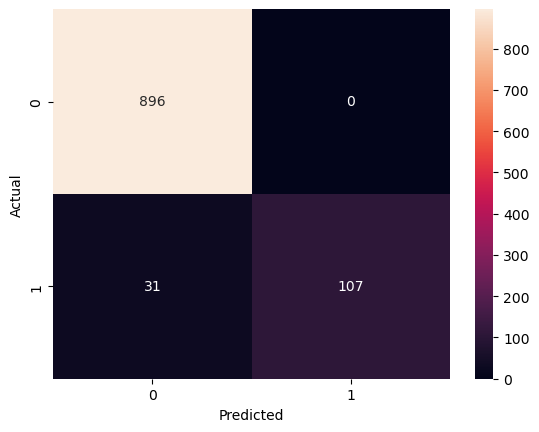

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Parameter Tuning

In [23]:
# create TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

In [24]:
# Recreate Features
X = tfidf.fit_transform(df['processed_message']).toarray()
y = df['label']

In [25]:
# Split again
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)

In [26]:
# Retrain Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Accuracy by Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred)
nb_accuracy


0.9700193423597679

In [27]:
# Re-evaluate
nb_precision = precision_score(y_test, y_pred, pos_label='spam')
nb_recall = recall_score(y_test, y_pred, pos_label='spam')
nb_f1 = f1_score(y_test, y_pred, pos_label='spam')

### Evaluation through Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

# Accuracy by Random Forest
rf_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy

0.9700193423597679

In [29]:
rf_precision = precision_score(y_test, rf_pred, pos_label='spam')
rf_recall = recall_score(y_test, rf_pred, pos_label='spam')
rf_f1 = f1_score(y_test, rf_pred, pos_label='spam')

### Evaluation through Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

# Accuracy by Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_accuracy

0.9516441005802708

In [31]:
lr_precision = precision_score(y_test, lr_pred, pos_label='spam')
lr_recall = recall_score(y_test, lr_pred, pos_label='spam')
lr_f1 = f1_score(y_test, lr_pred, pos_label='spam')

### Model Comparison
Multiple machine learning models were trained and evaluated 
- to identify the most suitable classifier for spam detection.
- Different algorithms capture patterns differently. 

Therefore, Naive Bayes, Random Forest, and Logistic Regression were compared using Accuracy, Precision, Recall, and F1 Score.


In [32]:
comparison = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression'],
    'Accuracy': [nb_accuracy, rf_accuracy, lr_accuracy],
    'Precision': [nb_precision, rf_precision, lr_precision],
    'Recall': [nb_recall, rf_recall, lr_recall],
    'F1 Score': [nb_f1, rf_f1, lr_f1]
})

comparison


,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.970019,1.000000,0.775362,0.873469
1,Random Forest,0.970019,0.982301,0.804348,0.884462
2,Logistic Regression,0.951644,0.978261,0.652174,0.782609


    This comparison helps select the best-performing model based on overall classification performance rather than relying on a single metric.

#### Final Model Selection

After evaluating all models, 
the Random Forest classifier was selected as the final model.

## Model Persistence (Saving)

In [33]:
import pickle

pickle.dump(rf, open('spam_model.pkl', 'wb'))
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))


## Prediction Demo

In [36]:
model = pickle.load(open('spam_model.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

sample = ["URGENT! Claim your FREE cash reward now!!!"]

sample_cleaned = [preprocess_text(msg) for msg in sample]
sample_vectorized = vectorizer.transform(sample_cleaned)

model.predict(sample_vectorized)


array(['spam'], dtype=object)

In [37]:
print(sample_cleaned)

['urgent claim free cash reward']


### Conclusion 
Finally, the saved model predicts whether the message belongs to the Spam or Ham category.

* Input Message:
  
"URGENT! Claim your FREE cash reward now!!!"

* Model Prediction:

Spam

    The prediction confirms that the system correctly identifies promotional or suspicious messages.